<a href="https://colab.research.google.com/github/Love-Reen/Excel-PowerBI-Projects/blob/main/Dealing_with_Missing_Data_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dealing with Missing Data - Lab

## Introduction

In this lab, we'll work through strategies for data cleaning and dealing with missing values (`NaN`s).

## Objectives
In this lab you will:

- Identify missing values in a dataframe using built-in methods
- Explain why missing values are a problem in data science

## Dataset

In this lab, we'll continue working with the _Titanic Survivors_ dataset, which can be found in `'titanic.csv'`.

Before we can get going, we'll need to import the usual libraries.  In the cell below, import:
* `pandas` as `pd`
* `numpy` as `np`
* `matplotlib.pyplot` as `plt`
* set `%matplotlib inline`

In [10]:
# Import necessary libraries below
# Import the required libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


Now, let's get started by reading in the data from the `'titanic.csv'` file and storing it the DataFrame `df`. Subsequently, be sure to preview the data.

In [11]:
# Use pandas to load the csv file
# Read the CSV file into a DataFrame
df = pd.read_csv("/content/titanic (2).csv")

df.head()




,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   891 non-null    int64  
 1   PassengerId  891 non-null    int64  
 2   Survived     891 non-null    int64  
 3   Pclass       891 non-null    object 
 4   Name         891 non-null    object 
 5   Sex          891 non-null    object 
 6   Age          714 non-null    float64
 7   SibSp        891 non-null    int64  
 8   Parch        891 non-null    int64  
 9   Ticket       891 non-null    object 
 10  Fare         891 non-null    float64
 11  Cabin        204 non-null    object 
 12  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


## Find missing values in a DataFrame

Before we can deal with missing values, we first need to find them. There are several easy ways to detect them.  We will start by answering very general questions, such as "does this DataFrame contain any null values?", and then narrowing our focus each time the answer to a question is "yes".

We'll start by checking to see if the DataFrame contains **any** missing values (NaNs) at all.

**_Hint_**: If you do this correctly, it will require method chaining, and will return a boolean value for each column.  

In [13]:
# Your code here

print(df.isnull().any().to_markdown(numalign="left", stralign="left"))

|             | 0   |
|:------------|:----|
| Unnamed: 0  | 0   |
| PassengerId | 0   |
| Survived    | 0   |
| Pclass      | 0   |
| Name        | 0   |
| Sex         | 0   |
| Age         | 1   |
| SibSp       | 0   |
| Parch       | 0   |
| Ticket      | 0   |
| Fare        | 0   |
| Cabin       | 1   |
| Embarked    | 1   |


Now we know which columns contain missing values, but not how many.

In the cell below, chain a different method with `isna()` to check how many total missing values are in each column.  

Expected Output:

```
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
```

In [14]:
# Your code here

print(df.isnull().sum().to_markdown(numalign="left", stralign="left"))

|             | 0   |
|:------------|:----|
| Unnamed: 0  | 0   |
| PassengerId | 0   |
| Survived    | 0   |
| Pclass      | 0   |
| Name        | 0   |
| Sex         | 0   |
| Age         | 177 |
| SibSp       | 0   |
| Parch       | 0   |
| Ticket      | 0   |
| Fare        | 0   |
| Cabin       | 687 |
| Embarked    | 2   |


Now that we know how many missing values exist in each column, we can make some decisions about how to deal with them.  

We'll deal with each column individually, and employ a different strategy for each.  


### Dropping the column

The first column we'll deal with is the `Cabin` column.  We'll begin by examining this column more closely.


In the cell below:
* Determine what percentage of rows in this column contain missing values
* Print out the number of unique values in this column

In [25]:
# Your code here
#percentage of missing values in the 'Cabin' column
missing_cabin_percentage = (df['Cabin'].isnull().sum() / len(df)) * 100

#number of unique values in the 'Cabin' column
unique_cabin_values = df['Cabin'].nunique()

#results
print(f"Percentage of missing values in 'Cabin' column: {missing_cabin_percentage:.2f}%")
print(f"Number of unique values in 'Cabin' column: {unique_cabin_values}")

Percentage of missing values in 'Cabin' column: 77.10%
Number of unique values in 'Cabin' column: 147


With this many missing values, it's probably best for us to just drop this column completely.

In the cell below:

* Drop the `Cabin` column in place from the `df` DataFrame
* Then, check the remaining number of null values in the dataset by using the code you wrote previously   

In [26]:
# Your code here
# Drop the 'Cabin' column in place
df.drop(columns='Cabin', inplace=True)

# Check the remaining number of null values in each column
print(df.isnull().sum().to_markdown(numalign="left", stralign="left"))

|             | 0   |
|:------------|:----|
| Unnamed: 0  | 0   |
| PassengerId | 0   |
| Survived    | 0   |
| Pclass      | 0   |
| Name        | 0   |
| Sex         | 0   |
| Age         | 177 |
| SibSp       | 0   |
| Parch       | 0   |
| Ticket      | 0   |
| Fare        | 0   |
| Embarked    | 2   |


### Computing placeholder values

Recall that another common strategy for dealing with missing values is to replace them with the mean or median for that column. We'll begin by investigating the current version of the `'Age'` column.  

In the cell below:

* Plot a histogram of values in the `'Age'` column with 80 bins (1 for each year)    
* Print out the mean and median for the column   

Mean of 'Age' column: 29.70
Median of 'Age' column: 28.00


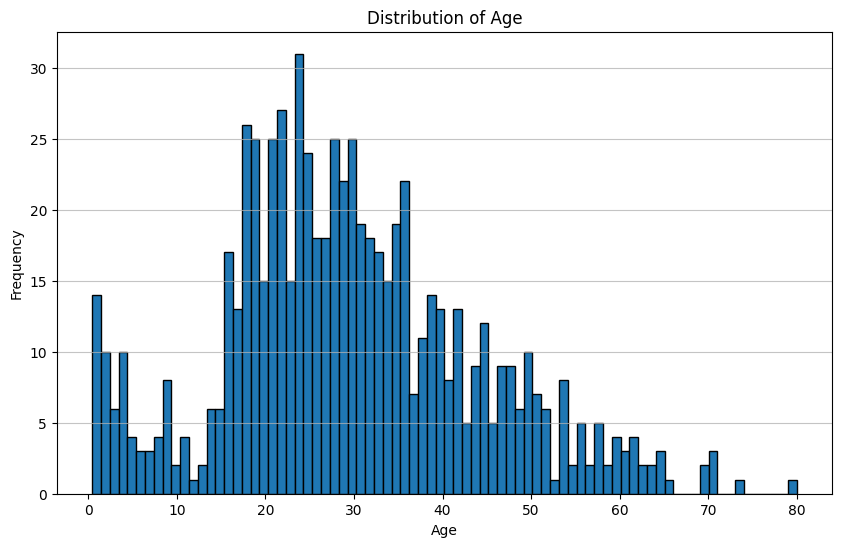

In [27]:
# Your code here
import matplotlib.pyplot as plt

# Plot a histogram of the 'Age' column with 80 bins
plt.figure(figsize=(10, 6))
plt.hist(df['Age'], bins=80, edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.savefig('age_histogram.png')

# Calculate and print the mean and median of the 'Age' column
age_mean = df['Age'].mean()
age_median = df['Age'].median()

print(f"Mean of 'Age' column: {age_mean:.2f}")
print(f"Median of 'Age' column: {age_median:.2f}")

From the visualization above, we can see the data has a slightly positive skew.

In the cell below, replace all missing values in the `'Age'` column with the median of the column.  **Do not hard code this value -- use the methods from pandas or numpy to make this easier.**  Do this replacement in place on the DataFrame.

In [28]:
# Your code here
# Fill missing values in 'Age' column with the median
df['Age'].fillna(df['Age'].median(), inplace=True)

# Verify that there are no more missing values in 'Age'
print(df['Age'].isnull().sum())

0


/tmp/ipython-input-28-2121025440.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


Now that we've replaced the values in the `'Age'` column, let's confirm that they've been replaced.  

In the cell below, check how many null values remain in the dataset.  

In [29]:
# Your code here
#  total number of remaining null values in each column
print(df.isnull().sum().to_markdown(numalign="left", stralign="left"))

|             | 0   |
|:------------|:----|
| Unnamed: 0  | 0   |
| PassengerId | 0   |
| Survived    | 0   |
| Pclass      | 0   |
| Name        | 0   |
| Sex         | 0   |
| Age         | 0   |
| SibSp       | 0   |
| Parch       | 0   |
| Ticket      | 0   |
| Fare        | 0   |
| Embarked    | 2   |


Now we need to deal with the two pesky missing values in the `'Embarked'` column.  

### Dropping rows that contain missing values

Perhaps the most common solution to dealing with missing values is to simply drop any rows that contain them.  Of course, this is only a good idea if the number dropped does not constitute a significant portion of our dataset.  Often, you'll need to make the overall determination to see if dropping the values is an acceptable loss, or if it is a better idea to just drop an offending column (e.g. the `'Cabin'` column) or to impute placeholder values instead.

In the cell below, use the appropriate built-in DataFrame method to drop the rows containing missing values. Do this in place on the DataFrame.  

In [30]:
# Your code here
# Drop the 'Unnamed: 0' column
df.drop(columns='Unnamed: 0', inplace=True)

# initial number of rows before dropping
initial_rows = df.shape[0]
print(f"Number of rows before dropping NaNs: {initial_rows}")

# Drop rows containing missing values
df.dropna(inplace=True)

# Get the number of rows after dropping
rows_after_dropping = df.shape[0]
print(f"Number of rows after dropping NaNs: {rows_after_dropping}")
print(f"Number of rows dropped: {initial_rows - rows_after_dropping}")

# Check the total number of remaining null values in each column
print("\nMissing values in each column after dropping rows:")
print(df.isnull().sum().to_markdown(numalign="left", stralign="left"))

Number of rows before dropping NaNs: 891
Number of rows after dropping NaNs: 889
Number of rows dropped: 2

Missing values in each column after dropping rows:
|             | 0   |
|:------------|:----|
| PassengerId | 0   |
| Survived    | 0   |
| Pclass      | 0   |
| Name        | 0   |
| Sex         | 0   |
| Age         | 0   |
| SibSp       | 0   |
| Parch       | 0   |
| Ticket      | 0   |
| Fare        | 0   |
| Embarked    | 0   |


We've dealt with all the **_obvious_** missing values, but we should also take some time to make sure that there aren't symbols or numbers included that are meant to denote a missing value.

### Missing values with placeholders

A common thing to see when working with datasets is missing values denoted with a preassigned code or symbol.  Let's check to ensure that each categorical column contains only what we expect.

In the cell below, return the unique values in the `'Embarked'`, `'Sex'`, `'Pclass'`, and `'Survived'` columns to ensure that there are no values in there that we don't understand or can't account for.  

In [31]:
# Your code here
# unique values for 'Embarked' column
print(f"Unique values in 'Embarked' column: {df['Embarked'].unique()}")

#unique values for 'Sex' column
print(f"Unique values in 'Sex' column: {df['Sex'].unique()}")

#unique values for 'Pclass' column
print(f"Unique values in 'Pclass' column: {df['Pclass'].unique()}")

#unique values for 'Survived' column
print(f"Unique values in 'Survived' column: {df['Survived'].unique()}")

Unique values in 'Embarked' column: ['S' 'C' 'Q']
Unique values in 'Sex' column: ['male' 'female']
Unique values in 'Pclass' column: ['3' '1' '2' '?']
Unique values in 'Survived' column: [0 1]


It looks like the `'Pclass'` column contains some missing values denoted by a placeholder.

In the cell below, investigate how many placeholder values this column contains.  Then, deal with these missing values using whichever strategy you believe is most appropriate in this case.  

In [34]:
# Your code here
# Count the number of '?' placeholders in the 'Pclass' column
placeholder_count = (df['Pclass'] == '?').sum()
print(f"Number of '?' placeholders in 'Pclass' column: {placeholder_count}")

# Replace '?' with NaN to allow mode calculation to ignore them
df['Pclass'] = df['Pclass'].replace('?', pd.NA)

# Calculate the mode of the 'Pclass' column
pclass_mode = df['Pclass'].mode()[0]
print(f"Mode of 'Pclass' column: {pclass_mode}")



Number of '?' placeholders in 'Pclass' column: 0
Mode of 'Pclass' column: 3


In [33]:
# Your code here
# Replace the missing values (originally '?') with the mode
df['Pclass'].fillna(pclass_mode, inplace=True)

# Verify that there are no more '?' or NaN values in 'Pclass'
print(f"Number of '?' after imputation: {(df['Pclass'] == '?').sum()}")
print(f"Number of NaNs after imputation: {df['Pclass'].isnull().sum()}")

# Print unique values in 'Pclass' to confirm
print(f"Unique values in 'Pclass' column after imputation: {df['Pclass'].unique()}")

Number of '?' after imputation: 0
Number of NaNs after imputation: 0
Unique values in 'Pclass' column after imputation: ['3' '1' '2']


**_Question:_** What is the benefit of treating missing values as a separate valid category?  What is the benefit of removing or replacing them? What are the drawbacks of each? Finally, which strategy did you choose? Explain your choice below.

Write your answer below this line:
______________________________________________________________________________________________________

<details>
    <summary style="cursor: pointer; display: inline">
        <b><u>Solution (click to reveal)</u></b>
    </summary>
    <p>Sample response:

By treating missing values as a separate category, information is preserved.
Perhaps there is a reason that this information is missing.
By removing or replacing missing information, we can more easily conduct mathematical analyses which require values for computation.
I chose to randomly replace for now. I could have just as easily removed the data.
Concerns include that I imputed the wrong value (indeed it was a random guess).
The strategy for dealing with missing data will depend on our desired application,
but regardless of the approach taken, the ramifications of how missing data are handled must be considered.
For example, imputing the median of our age reduces variance
and assumes that a new value would be close to the center of the distribution
(albeit this assumption is statistically likely).</p>
</details>

Now, let's do a final check to ensure that there are no more missing values remaining in this dataset.  

In the cell below, reuse the code you wrote at the beginning of the notebook to check how many null values our dataset now contains.  

In [35]:
# Your code here
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,False,False,False,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False


In [36]:
df.isna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,False,False,False,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False


Those all seem in line with our expectations.  We can confidently say that this dataset contains no pesky missing values that will mess up our analysis if we continue with this dataset.

## Summary

In this lab, we learned:
* How to detect missing values in our dataset
* How to deal with missing values by dropping rows
* How to deal with missing values by imputing mean/median values
* Strategies for detecting missing values encoded with a placeholder